<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

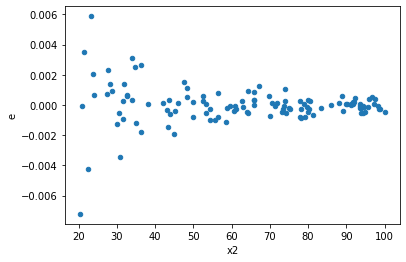

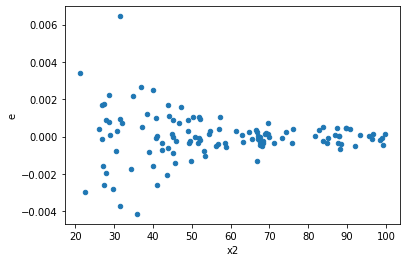

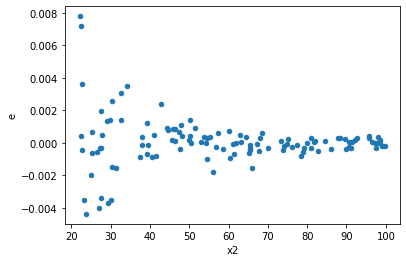

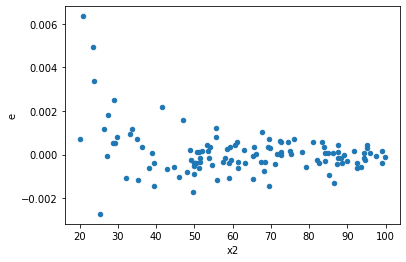

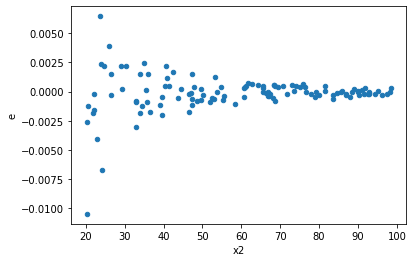

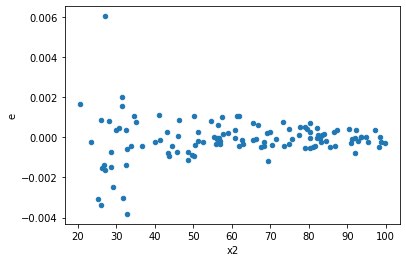

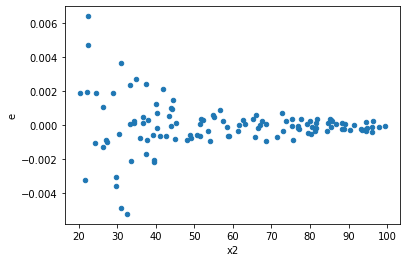

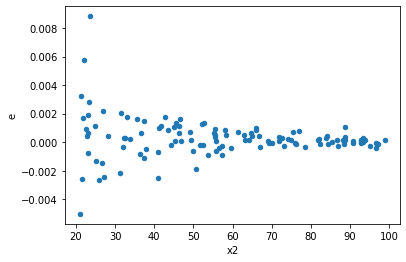

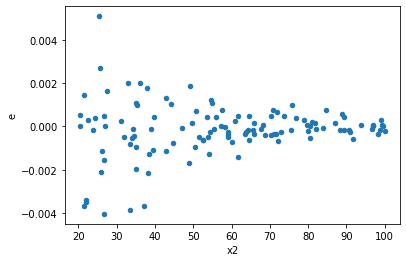

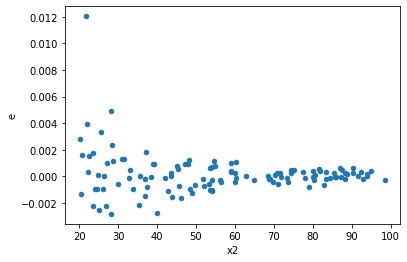

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
137.0,45.0,45.0,0.00014281189628472836,0.00014863838402501517,3.173597695216186e-06,3.3030752005558925e-06,1.040798336076081,0.8938955733850062,0.5530522133074969,0.4469477866925031,Reject001=1 : Homoscedasticity
204.0,45.0,45.0,4.318710321228569e-05,4.559292254343339e-05,9.597134047174598e-07,1.013176056520742e-06,1.055706892849977,0.8565170701840068,0.5717414649079966,0.4282585350920034,Reject001=1 : Homoscedasticity
221.0,45.0,45.0,6.040817896887433e-05,6.589811319746883e-05,1.3424039770860962e-06,1.4644025154993073e-06,1.0908806443482302,0.7717429035267176,0.6141285482366412,0.3858714517633588,Reject001=1 : Homoscedasticity
441.0,45.0,45.0,8.802008423693398e-05,0.00010424545445935654,1.9560018719318664e-06,2.3165656546523675e-06,1.184337135814899,0.5727676005979596,0.7136161997010202,0.2863838002989798,Reject001=1 : Homoscedasticity
455.0,45.0,45.0,5.8960345310117215e-05,5.9503626845596246e-05,1.3102298957803826e-06,1.3223028187910276e-06,1.0092143547094492,0.9755934177855952,0.5122032911072024,0.4877967088927976,Reject001=1 : Homoscedasticity
623.0,45.0,45.0,7.733185560691974e-05,0.00011022811288865489,1.718485680153772e-06,2.4495136197478864e-06,1.4253907658565426,0.2383158753882466,0.8808420623058767,0.1191579376941233,Reject001=1 : Homoscedasticity
760.0,45.0,45.0,0.00010251061814302084,0.00011931437959790745,2.2780137365115743e-06,2.6514306577312764e-06,1.1639221551804741,0.6128035487949375,0.6935982256025313,0.30640177439746874,Reject001=1 : Homoscedasticity
850.0,45.0,45.0,4.45454903094046e-05,7.454914834569935e-05,9.898997846534356e-07,1.6566477410155412e-06,1.6735509661672816,0.0875766882475697,0.9562116558762151,0.04378834412378485,Reject001=1 : Homoscedasticity
918.0,45.0,45.0,6.950887496762769e-05,7.195914223550676e-05,1.5446416659472819e-06,1.599092049677928e-06,1.035251142663728,0.9080067481960694,0.5459966259019653,0.4540033740980347,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.00016336459394724,1.4472433453400915e-05,3.630324309938667e-06,3.216096322977981e-07,0.08858978009687284,2.2376980270098845e-13,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,0.00011168827016319388,2.7058241305712975e-05,2.4819615591820864e-06,6.012942512380661e-07,0.24226573897309617,5.326531721081411e-06,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,0.00017600366584076928,6.501613988447351e-05,3.911192574239318e-06,1.4448031085438559e-06,0.3694021915617013,0.0011257329943066294,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,8.265006335608701e-05,1.2050826738656699e-05,1.8366680745797112e-06,2.6779614974792666e-07,0.1458054144101171,1.8392259917150572e-09,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,0.000253909451823713,1.9112137008368727e-05,5.6424322627491785e-06,4.2471415574152724e-07,0.07527146733252807,9.71506342829796e-15,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,9.223160259247317e-05,2.0153982843066263e-05,2.049591168721626e-06,4.478662854014725e-07,0.2185149371427163,1.190528767263724e-06,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,0.00013926717079470712,1.3391421511341104e-05,3.0948260176601582e-06,2.97587144696469e-07,0.09615634061441025,1.0508477948967777e-12,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,0.0001050247592790032,1.666811678905924e-05,2.3338835395334045e-06,3.7040259531242754e-07,0.15870654599435552,7.672455005574451e-09,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.00011589418086677559,2.9540128237153628e-05,2.575426241483902e-06,6.564472941589696e-07,0.25488879610884896,1.085659714456322e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    919
Reject001=1 : Homoscedasticity       81
Name: Result_test, dtype: int64